<a href="https://colab.research.google.com/github/aparnamar4/Face_Recognition/blob/master/Aparna_Joseph_ML_Project_Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import warnings
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

Ignore Warnings

In [ ]:
warnings.filterwarnings("ignore")

Importing Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Air_Quality_Dataset.csv")
df

,id,country,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,0,India,Andhra_Pradesh,A0ntapur,Gulzarpet,APPCB,26-12-2023 22:00,14.675886,77.593027,SO2,0,0,0
1,1,India,Andhra_Pradesh,Chittoor,Gangineni Cheruvu,APPCB,26-12-2023 22:00,13.204880,79.097889,SO2,7,32,12
2,2,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,NH3,2,5,3
3,3,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,CO,40,64,47
4,4,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,OZONE,9,50,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,3311,India,West_Bengal,Kolkata,Jadavpur,WBPCB,26-12-2023 22:00,22.499290,88.369170,PM10,80,202,125
3312,3312,India,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,26-12-2023 22:00,22.511060,88.351420,NH3,2,21,8
3313,3313,India,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,26-12-2023 22:00,22.511060,88.351420,SO2,7,63,23
3314,3314,India,West_Bengal,Kolkata,Rabindra Sarobar,WBPCB,26-12-2023 22:00,22.511060,88.351420,OZONE,3,90,45


Exploratory Data Analysis

In [ ]:
df.isna().sum()

id               0
country          0
state            0
city             0
station          0
station_code     0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [ ]:
df.drop(["id","country","state","city","station","station_code","last_update"],axis=1,inplace=True)
df

,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,14.675886,77.593027,SO2,0,0,0
1,13.204880,79.097889,SO2,7,32,12
2,13.670000,79.350000,NH3,2,5,3
3,13.670000,79.350000,CO,40,64,47
4,13.670000,79.350000,OZONE,9,50,34
...,...,...,...,...,...,...
3311,22.499290,88.369170,PM10,80,202,125
3312,22.511060,88.351420,NH3,2,21,8
3313,22.511060,88.351420,SO2,7,63,23
3314,22.511060,88.351420,OZONE,3,90,45


In [ ]:
scaler=MinMaxScaler()
le=LabelEncoder()
df["pollutant_id"]=le.fit_transform(df["pollutant_id"])
df

,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,14.675886,77.593027,6,0,0,0
1,13.204880,79.097889,6,7,32,12
2,13.670000,79.350000,1,2,5,3
3,13.670000,79.350000,0,40,64,47
4,13.670000,79.350000,3,9,50,34
...,...,...,...,...,...,...
3311,22.499290,88.369170,4,80,202,125
3312,22.511060,88.351420,1,2,21,8
3313,22.511060,88.351420,6,7,63,23
3314,22.511060,88.351420,3,3,90,45


In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [ ]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.24112188, 0.28169362, 1.        , 0.        , 0.        ],
       [0.18355118, 0.34511657, 1.        , 0.01886792, 0.064     ],
       [0.20175456, 0.35574188, 0.16666667, 0.00539084, 0.01      ],
       ...,
       [0.54776675, 0.73510994, 1.        , 0.01886792, 0.126     ],
       [0.54776675, 0.73510994, 0.5       , 0.00808625, 0.18      ],
       [0.71123644, 0.73780006, 0.16666667, 0.01617251, 0.044     ]])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1)

Multi-Linear Regression

In [ ]:
mlr=LinearRegression()
mlr.fit(X_train,Y_train)
Y_pred=mlr.predict(X_test)
print(r2_score(Y_test,Y_pred))

0.9599265365396855


KNeighborsRegressor

In [ ]:
knr=KNeighborsRegressor()
knr.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred=knr.predict(X_test)
print(r2_score(Y_test,Y_pred))

0.9640633642121549


KNR - Hyper Parameter Tuning

In [ ]:
p_knr={"n_neighbors":[3,5,7],"weights":['uniform','distance'],"algorithm":['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knr,p_knr,cv=10,scoring="r2")
clf.fit(X_train,Y_train)
clf.best_params_

{'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}

In [ ]:
KNR=KNeighborsRegressor(algorithm='brute',n_neighbors=7,weights='distance')

KNeighborsRegressor(algorithm='brute', n_neighbors=7, weights='distance')

Random Forest Regressor

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
Y_pred=rfr.predict(X_test)
print(r2_score(Y_test,Y_pred))

0.9709753679416812


Random Forest Regressor- Hyper Parameter Tuning

In [ ]:
p_rfr={"criterion":["squared_error","absolute_error","friedman_mse","poisson"],"max_features":['sqrt','log2','auto']}
clf=GridSearchCV(rfr,p_rfr,cv=10,scoring="r2")
clf.fit(X_train,Y_train)
clf.best_params_

{'criterion': 'absolute_error', 'max_features': 'sqrt'}

In [ ]:
RFR=RandomForestRegressor(criterion='absolute_error',max_features='sqrt')

AdaBoostRegressor

In [ ]:
abr=AdaBoostRegressor()
abr.fit(X_train,Y_train)

AdaBoostRegressor()

In [ ]:
Y_pred=abr.predict(X_test)
print(r2_score(Y_test,Y_pred))

0.9429286626493191


AdaBoostRegressor - Hyper Parameter Tuning

In [ ]:
p_abr={"n_estimators":[50,100,200],"loss":['linear','square','exponential'],"learning_rate":[0.01,0.1,0.5]}
clf=GridSearchCV(abr,p_abr,cv=10,scoring='r2')
clf.fit(X_train,Y_train)
clf.best_params_

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 200}

In [ ]:
ABR=AdaBoostRegressor(learning_rate=0.1,loss='linear',n_estimators=200)

AdaBoostRegressor(learning_rate=0.1, n_estimators=200)

Evaluation of Model Performance

In [ ]:
models=[mlr,KNR,RFR,ABR]
predictions={}
for model in models:
  print("\n\n********************",model,"********************\n")
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print("r2 score:",r2_score(Y_test,Y_pred))
  print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))
  print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))
  print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,Y_pred)))
  predictions[model]=Y_pred



******************** LinearRegression() ********************

r2 score: 0.9599265365396855
Mean Absolute Error: 9.35596414738381
Mean Squared Error: 300.81839658375907
Root Mean Squared Error: 17.344117059791746


******************** KNeighborsRegressor(algorithm='brute', n_neighbors=7, weights='distance') ********************

r2 score: 0.9683999922994015
Mean Absolute Error: 9.586933625055153
Mean Squared Error: 237.2109328144871
Root Mean Squared Error: 15.401653574031819


******************** RandomForestRegressor(criterion='absolute_error', max_features='sqrt') ********************

r2 score: 0.9721836431753387
Mean Absolute Error: 7.578291457286432
Mean Squared Error: 208.808301959799
Root Mean Squared Error: 14.450200758460037


******************** AdaBoostRegressor(learning_rate=0.1, n_estimators=200) ********************

r2 score: 0.9572258020981864
Mean Absolute Error: 12.948842899026957
Mean Squared Error: 321.09192759749016
Root Mean Squared Error: 17.91903813259769


                                                   0
0                                 LinearRegression()
1  KNeighborsRegressor(algorithm='brute', n_neigh...
2  (DecisionTreeRegressor(criterion='absolute_err...
3  (DecisionTreeRegressor(max_depth=3, random_sta...


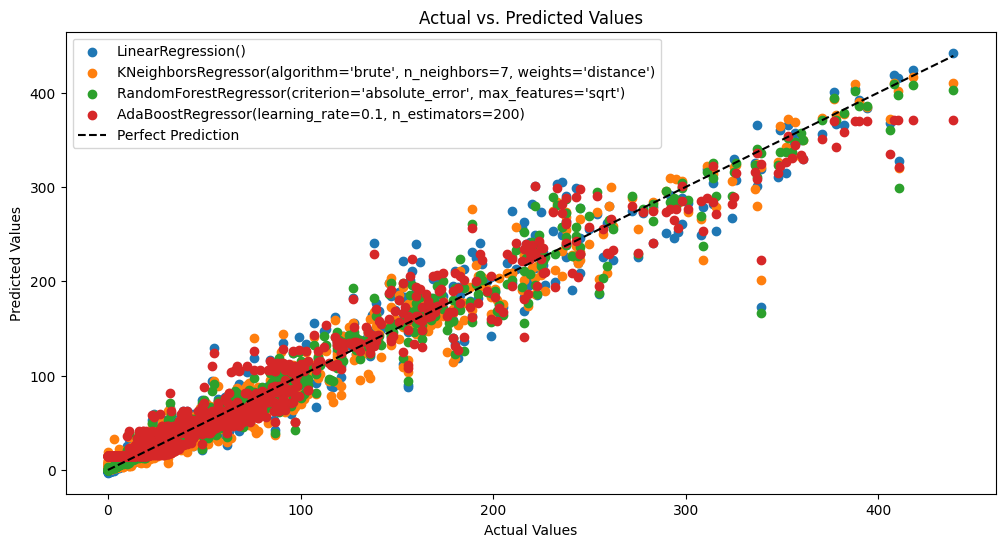

In [ ]:
# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))
for model,Y_pred in predictions.items():
    plt.scatter(Y_test,Y_pred,label=model)

plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], '--', color='black', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

**Best Model: RANDOM FOREST REGRESSOR**
It is seen that Random Forest Regressor is the best model with highest r2 score for calculating Air Quality Index.

In [ ]:
Y_new=RFR.predict(scaler.transform([[13.670000,79.350000,1,2,5]]))
print(Y_new)

[3.17]
